# 数据科学竞赛入门



> 前言：这篇文章是翻译文章，主要内容是通过实战「泰坦尼克号的数据科学解决方案」给小白讲解如何入门数据科学竞赛，例如：Kaggle。写得很好，让我们开始吧。



## 工作流程

解决问题的流程主要有以下七个阶段：

+ 问题的定义（Question or problem definition）

+ 得到训练数据和测试数据（Acquire training and testing data）

+ Wrangle, 准备清洗数据（Wrangle, prepare, cleanse the data）

+ 分析，识别模式并探索数据（Analyze, identify patterns, and explore the data）

+ 建模，预测和解决问题（Model, predict and solve the problem）

+ 可视化，报告和呈现问题解决步骤和最终解决方案（Visualize, report, and present the problem solving steps and final solution）

+ 提交结果（Supply or submit the results）



以上流程只是一般情况，还有其他的例外

+ 我们可以结合多个工作流程，通过可视化分析数据
+ 早于指示的顺序提前某一个阶段。比如我们可以提前分析数据在 wrangling 之后
+ 在工作流程中多次重复一个阶段。可视化阶段可以重复多次
+ 跳过某些阶段。 We may not need supply stage to productize or service enable our dataset for a competition.



## 问题和问题的定义（Question and problem definition）



这些像 Kaggle 的竞赛网站提出问题的同时会提供训练数据集和测试数据集。Titanic Survival competition 的描述在***[这里](https://www.kaggle.com/c/titanic)***



> 根据那些在泰坦尼克号灾难，幸存或没有幸存的乘客的一组训练样本，我们的模型可以根据不知道是否幸存的测试数据集，判断是否这些在测试数据集的乘客能否幸存



我们可能还希望对我们问题的领域有一些早期的了解。描述在***[这里](https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook)***。重点在这



+ 1912 年 4 月 15 日，在她的处女航中，泰坦尼克号在与冰山相撞后沉没，在 2224 名乘客和机组人员中造成 1502 人死亡。也就是说幸存率为 32%
+ 造成海难失事的原因之一是乘客和机组人员没有足够的救生艇。
+ 对于幸存者来说能活下来有幸存因素，但是有些人比其他人更容易幸存，例如妇女、儿童和上流社会的人



## 工作流程目标

数据科学解决方案的工作流程解决了七个主要目标



+ **分类** 

  我们可能想对样本进行分类。我们可能还想了解不同类的含义以及与我们目标的相关性
  

+ **相关**

  可以基于训练数据集内的可用特征来解决问题。数据集中的哪些功能对我们的解决方案目标有重大贡献？从统计学上讲，功能和解决方案目标之间是否存在相关性？随着特征值的变化，解决方案状态也会发生变化，反之亦然。这可以针对给定数据集中的数字和分类特征进行测试。我们可能还希望确定除后续目标和工作流程阶段的生存之外的特征之间的相关性。关联某些功能可能有助于创建，完成或更正特征。


+ **转换**

  对于建模阶段，需要准备数据。根据模型算法的选择，可能需要将所有特征转换为数值等效值。例如，将文本分类值转换为数值。


+ **完成**

  数据准备可能还需要我们估计要素中的任何缺失值。当没有缺失值时，模型算法可能最有效。


+ **更正**


+ **创造**


+ **制图**

  

## 开始


In [11]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### 得到数据

我们可以通过 Pandas 帮助我们得到文件里的数据集，开始的时候我们把训练数据和测试数据放进 Pandas DataFrames。我们把这些数据合并在一起处理。

In [12]:
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')
combine = [train_df, test_df]

### 通过描述数据分析

Pandas 也能完成下述问题



+ **数据集中有有哪些特征？**

In [13]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


+ **数据集中有哪些特征是可以用来分类的**

这些值将样本分类为类似样本的集合。在分类特征中，基于名义，序数，比率或区间的值？除此之外，这有助于我们选择适当的可视化图。

**可以用来分类的类别：Survived, Sex, Embarked. Ordinal: Pclass.**

+ **数据集中有哪些特征是数字**

哪些特征是数字的？这些值随样品而变化。在数值特征中，值是离散的，连续的还是基于时间序列的？除此之外，这有助于我们选择适当的可视化图。



**连续的特征：Age, Fare                 离散的数据：SibSp, Parch**

In [18]:
# 预览数据
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


+ 哪些特征混合了不同的数据类型

在同一个特征里面既有数字、也有字母，这些是需要更正的候选数据

**Ticket 是数字和字母数字数据类型的混合。Cabin 是字母和数字**



+ 哪些特征可能包含错误或拼写错误？

对于大型数据集来说，这很难检查，但是从较小的数据集中查看一些样本可能只是告诉我们，哪些功能可能需要更正。



**Name 可能包含错误或拼写错误，因为有几种方法可用于描述名称，包括标题，圆括号和用于替代或短名称的引号**

In [17]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


+ **有哪些特征值包含空数据**

这些值需要改正

Cabin > Age > Embarked 特征按训练数据集的顺序包含许多空值。

Cabin > Age 在测试数据集上不完整。


+ **所有特征的数据类型是什么？**

转换目标的时候对我们有帮助。

有七个特征是证书或者浮点数，在测试集中只有六个。

有五个特征值是字符串



In [19]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

+ **样本中数值特征值的分布是什么？**

这个问题的答案帮助我们在其他早期的见解中，判断实际问题领域中训练数据有多少代表性。

    + 一共有 891 个样本，或者说占泰坦尼克号乘客数（2224）的百分之四十。
    + Survived 是可分类特征只有 0 1 两个值
    + 数据中幸存率大约是 38% 代表着实际幸存率 32%
    + 绝大多数乘客（> 75%）没有带小孩或者父母
    + 30％ 的乘客有兄弟姐妹和/或配偶
    + 票价差异很大，很少有乘客（< 1％）支付高达 512 美元
    + 年龄在65-80岁之间的老年乘客（< 1％）很少

In [21]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


+ **分类特征的分布是什么？**

名称在整个数据集中是唯一的（count = unique = 891）

性别变量为两个可能的值，男性为65％（top = male，freq= 577 / (count = 891)）。

Cabin 在样本中有几个副本。或者，几个乘客共用一个 Cabin。

Embarked 有三个可能的值，其中 S 最多

Ticket 有很高的重复率（22% unique=681）

In [22]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Drazenoic, Mr. Jozef",male,347082,G6,S
freq,1,577,7,4,644


### 基于数据分析的假设

我们基于迄今为止所做的数据分析得出以下假设。我们可以在采取适当行动之前进一步验证这些假设。

+ **相关性**

我们想知道每个特征与生存的相关性。我们想在项目的早期完成这个，然后让这些快速关联与在之后模型关联中相匹配。

+ **补全**

我们可能希望补全年龄特征，因为它与生存明确相关

+ **更正**

1. Ticket 特征可能从我们分析中删除，因为重复率太高。而且与存活可能没有太高的相关性
2. Cabin 特征可能会因为高度不完整而被删除
3. PassengerId 可能会从训练数据集中删除，因为它对生存没有贡献
4. Name 特征不是很标准，对生存的贡献不是很大，所以可能被删除

+ **创造**

1. 我们可能想要创建一个名为 Family 的基于 Parch 和 SibSp 的新特征，以获得船上家庭成员的总数。
2. 我们可能设计 Name 特征以将 Title 提取为新特征。
3. 我们可能创建一个新的特征 Age bands。将连续的数字特征变为用序数可分的特征
4. 我们可能也想创建一个 Fare（票价）范围，如果对我们的分析确实会有帮助的话

+ **分类**

我们还可以根据前面提到的问题描述添加我们的假设。

1. 女性（Sex = female）更有可能幸存下来。
2. 儿童（Age < ？）更有可能幸存下来。
3. 上流社会的乘客（Pclass = 1）更有可能幸存下来。


### 通过旋转功能进行分析（没有看懂）

为了确认我们的一些观察和假设，我们可以通过相互转动特征来快速分析我们的特征相关性。我们只能在此阶段为没有任何空值的功能执行此操作。对于分类（性别），序数（Pclass）或离散（SibSp，Parch）类型的特征，这样做也是有意义的。

+ Pclass 我们观察到一个重要的相关性（> 0.5）在 Pclass = 1 与 存活之间。我们决定在我们的模型中包含此功能。

+ Sex 我们在问题定义中确认（Sex=female）的生存率非常高，为74％（分类＃1）。
+ SibSp 和 Parch 这些特征对于某些值具有零相关性。最好从这些单独的特征中导出一个特征或一组特征（创建＃1）。


In [27]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [28]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [29]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [30]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### 通过可视化分析数据

现在我们可以继续使用可视化来确认我们的一些假设来分析数据。

+ **关联数字特征**

让我们首先了解数值特征与我们的解决方案目标（生存）之间的相关性。


直方图可用于分析像 Age 这样的连续数值变量，其中条带或范围将有助于识别有用的模式。直方图可以使用自动定义的区间或等距离范围来指示样本的分布。这有助于我们回答与特定宽度相关的问题（婴儿的生存率是否更高？）

请注意，直方图可视化中的 x 轴表示样本或乘客的数量。（Note that x-axis in historgram visualizations represents the count of samples or passengers）这句话翻译不出来。

**观察到**

+ 婴儿（年龄<= 4）的存活率很高。
+ 最年长的乘客（年龄= 80岁）幸免于难。
+ 大量15-25岁的人没有活下来。
+ 大多数乘客年龄在15-35岁之间。

**判断**

这个简单的分析给后续的工作流程阶段证实了我们的判断假设。


+ 我们应该在模型训练中考虑 Age（我们的假设分类＃2）
+ 填充空值的 Age 功能（填充＃1）
+ 我们应该创建年龄组（创建＃3）。

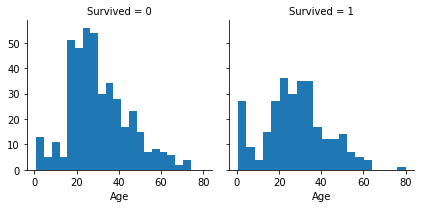

In [31]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### 关联数字和有序特征

我们可以使用单个图组合多个特征来识别相关性。这可以通过具有数值的数字和分类特征来完成。

**观察到**
+ Pclass = 3有大多数乘客，但大多数人没有幸存。确认我们的分类假设＃2。
+ Pclass = 2和Pclass = 3的婴儿乘客大部分幸存下来。进一步限定了我们的分类假设＃2

